# Example 5.1 — Corrosion Time-to-Failure Estimation using Pseudo Failure Times

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-10-07  
**Version:** 1.1  

---
## Problem Statement
Five specimens of a new corrosion-resistant material are tested for **240 hours** in a highly corrosive environment.
Each specimen has a density of **7.6 g/cm³** and an exposed surface area of **4.3 cm²**. After testing, the weight losses
(in mg) are: 11.1, 10.4, 12.1, 11.4, and 9.8. Assume measurements are accurate and free of error. **Structural failure
occurs if material loss exceeds 1 mm in depth.**
1. Estimate the **time to failure** (in hours) for each specimen.
2. Based on these estimated failure times, identify the **probability distribution that best describes the material's
life** using the ADT pseudo time failure method.

---

## Solution

Time to failure (hours):
 [70659. 75415. 64820. 68800. 80033.] 


--------------------- Best TTF Dist fit ------------------------ 
Lognormal TTF:
   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
0        Mu          11.181       0.0419076   11.0988   11.2631
1     Sigma       0.0937083       0.0460956 0.0357328  0.245747


Median Life: 71753 [hours]


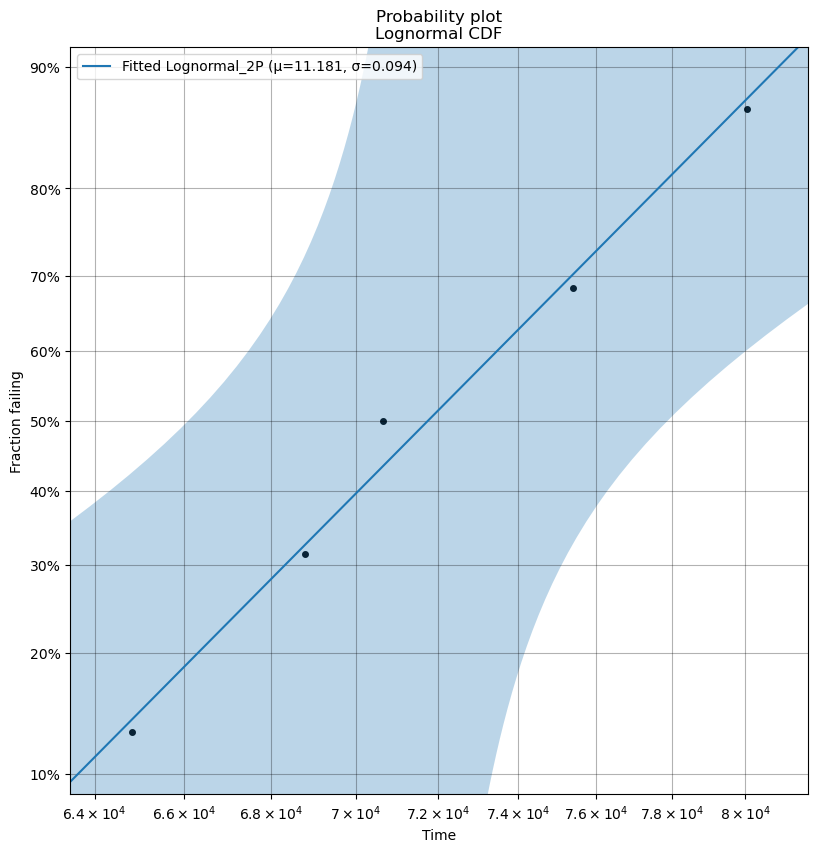

In [4]:
# EXAMPLE 5.1
import numpy as np
from reliability.Fitters import Fit_Weibull_2P, Fit_Lognormal_2P

# Mass loss in mg -> convert to kg
mass_loss = np.array([11.1, 10.4, 12.1, 11.4, 9.8]) * 1e-6  # [kg]

# Density and surface area
density = 7.6e3        # [kg/m^3]
surface_area = 4.3e-4  # [m^2]

# Test time
test_time = 240  # [hours]

# Failure Definition (1 mm depth loss)
D_f = 1e-3       # [m]

# Depth loss calculation - ASSUMPTION - lab setup is one exposed face of area. Uniform penetration just moves that face inward; its area remains essentially constant (edge effects negligible).
depth_loss = mass_loss / (density * surface_area)  # [m] after 240h

# Depth loss rate
depth_loss_rate = depth_loss / test_time  # [m/h]

# Time to failure for each specimen
TTF = D_f / depth_loss_rate  # [h]

print("Time to failure (hours):\n", np.round(TTF, 0),"\n\n")

# TTF dist parameters and goodness of fit
fit_5_1_Weibull = Fit_Weibull_2P(failures=TTF, method = 'LS', show_probability_plot=False, print_results=False)
fit_5_1_Lognormal = Fit_Lognormal_2P(failures=TTF, method = 'LS', show_probability_plot=True, print_results=False)

if fit_5_1_Lognormal.BIC < fit_5_1_Weibull.BIC:
    print(f"--------------------- Best TTF Dist fit ------------------------ \nLognormal TTF:\n {fit_5_1_Lognormal.results}\n\n") 
    print(f"Median Life: {np.exp(fit_5_1_Lognormal.mu):.0f} [hours]")
else:
    print(f"--------------------- Best TTF Dist fit ------------------------ \nWeibull TTF:\n {fit_5_1_Weibull.results}")
    print(f"Median Life: {fit_5_1_Weibull.alpha*(np.log(2))**(1/fit_5_1_Weibull.beta):.0f} [hours]")